In [20]:
import tensorflow as tf
import json
import matplotlib.pyplot as plt
import numpy as np
import time
import os
import sys

from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [21]:
# Stops the print of ms/step
class OutputFilter:
    def __init__(self, stream):
        self.stream = stream
        self.filter_strings = ["ms/step"]

    def write(self, message):
        if not any(f in message for f in self.filter_strings):
            self.stream.write(message)

    def flush(self):
        self.stream.flush()

# Save the original stdout so we can restore it later
original_stdout = sys.stdout

In [22]:
# Suppress TensorFlow logging except for fatal errors.
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# **Datasets: Loading**

In [8]:
# Load the dataset Shallow Models were trained on
path_to_load_shallow_dataset = 'savedDatasetShallowRGB'
test_ds_shallow = tf.data.experimental.load(path_to_load_shallow_dataset + '/test')

In [5]:
# Load the dataset Deep Models were trained on
path_to_load_deep_dataset = 'savedDatasetDeepRGB'
test_ds_deep = tf.data.experimental.load(path_to_load_deep_dataset + '/test')

In [29]:
# Load the dataset Shallow Models were trained on
path_to_load_shallow_grayscale_dataset = 'savedDatasetShallowGrayscale'
test_ds_shallow_grayscale = tf.data.experimental.load(path_to_load_shallow_grayscale_dataset + '/test')

In [30]:
# Load the dataset Grayscale Models were trained on
path_to_load_deep_grayscale_dataset = 'savedDatasetDeepGrayscale'
test_ds_deep_grayscale = tf.data.experimental.load(path_to_load_deep_grayscale_dataset + '/test')

# **CNN Model Evaluations: Charts and Results**



#### **<span style="color:blue"> Blue </span> and <span style="color:green"> Green </span> Chart (Training and Validation Accuracy):**

- The x-axis represents the epochs, showing the progress of training over time from epoch 1 to 10.
- The y-axis represents accuracy, which in this case measures the proportion of correct predictions made by the model.
- The blue line (marked with blue dots) tracks the training accuracy at each epoch.
- The solid blue line tracks the validation accuracy at each epoch. This measures how well the model performs on a separate set of data not seen during training, providing an indication of how well the model generalizes.

#### **<span style="color:red"> Red </span> and <span style="color:purple"> Purple </span> Chart (Training and Validation Accuracy):**

- The x-axis again represents the epochs.
- The y-axis represents loss, which is a measure of the prediction error made by the model. Lower values are better as they indicate a smaller error.
- The red dots represent the training loss at each epoch, showing how the model's error decreases as it learns.
- The solid red line represents the validation loss, which tracks how the prediction error evolves on the validation dataset.

---
---
---
---
---

# **CNN Models: Shallow vs Deep**

### **Load Models**

In [6]:
# Specify model history file names
shallow_model_file = 'json/cnn_model_shallow.json'
deep_model_file = 'json/cnn_model_deep.json'

# Function to load model history
def load_model_history(file_name):
    try:
        with open(file_name, 'r') as file:
            return json.load(file)
    except FileNotFoundError:
        print(f"Error: The file {file_name} does not exist.")
        return {}  # Assign an empty dictionary to prevent further errors if file is not found


In [9]:
# Load the training histories
history_shallow = load_model_history(shallow_model_file)
history_deep = load_model_history(deep_model_file)

# Access the history dictionaries
acc_shallow = history_shallow.get('accuracy', [])
val_acc_shallow = history_shallow.get('val_accuracy', [])
loss_shallow = history_shallow.get('loss', [])
val_loss_shallow = history_shallow.get('val_loss', [])

acc_deep = history_deep.get('accuracy', [])
val_acc_deep = history_deep.get('val_accuracy', [])
loss_deep = history_deep.get('loss', [])
val_loss_deep = history_deep.get('val_loss', [])

# Ensure both histories have the same number of epochs
epochs = range(1, min(len(acc_shallow), len(acc_deep)) + 1)

## **CNN Model: Shallow vs Deep - Training and Validation Accuracy Data Visualization**

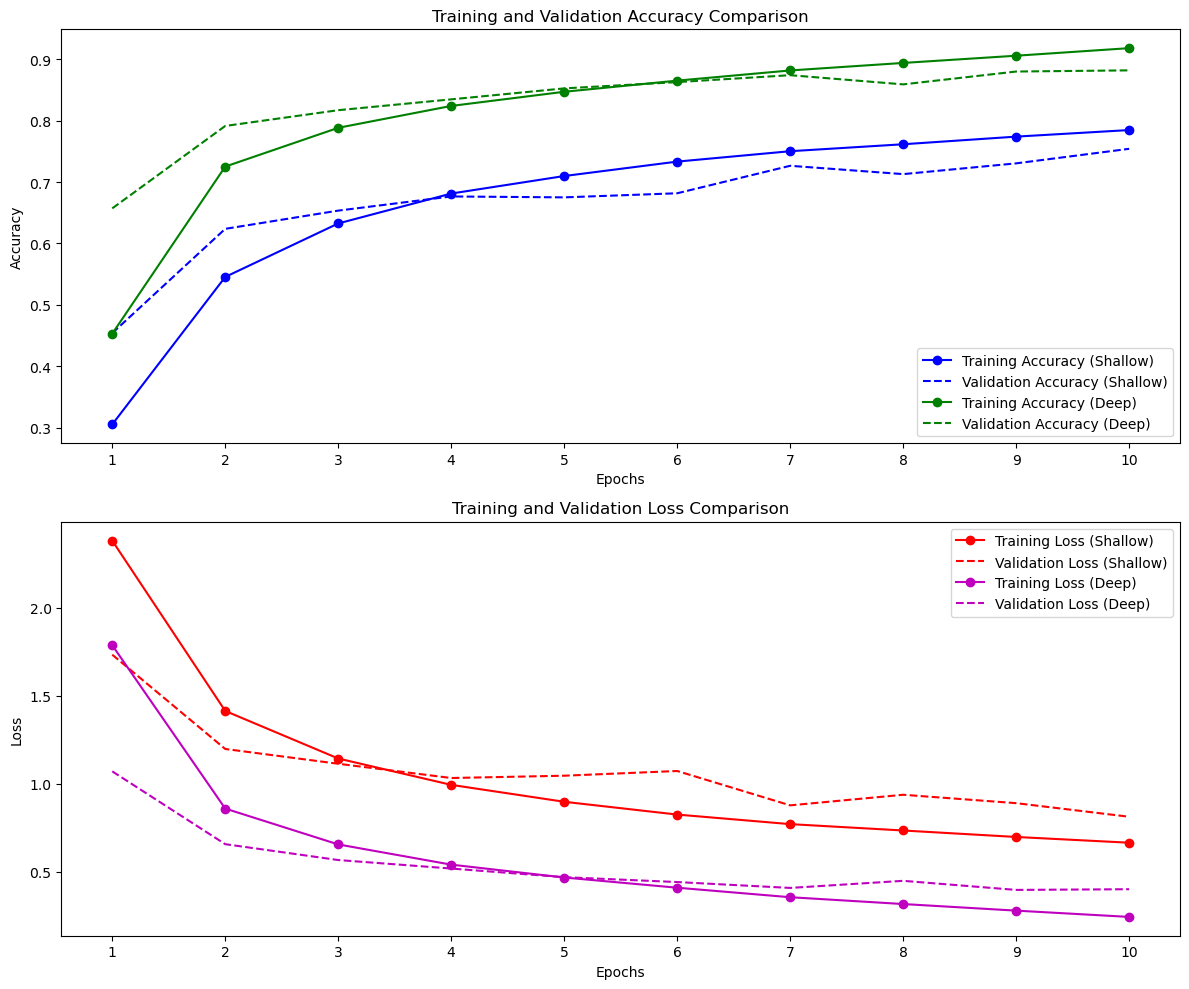

In [10]:
# Plotting
plt.figure(figsize=(12, 10))

# Accuracy subplot
plt.subplot(2, 1, 1)
plt.plot(epochs, acc_shallow, 'bo-', label='Training Accuracy (Shallow)')
plt.plot(epochs, val_acc_shallow, 'b--', label='Validation Accuracy (Shallow)')
plt.plot(epochs, acc_deep, 'go-', label='Training Accuracy (Deep)')
plt.plot(epochs, val_acc_deep, 'g--', label='Validation Accuracy (Deep)')
plt.title('Training and Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(list(epochs))  # Set x-ticks to show each epoch
plt.legend()

# Loss subplot
plt.subplot(2, 1, 2)
plt.plot(epochs, loss_shallow, 'ro-', label='Training Loss (Shallow)')
plt.plot(epochs, val_loss_shallow, 'r--', label='Validation Loss (Shallow)')
plt.plot(epochs, loss_deep, 'mo-', label='Training Loss (Deep)')
plt.plot(epochs, val_loss_deep, 'm--', label='Validation Loss (Deep)')
plt.title('Training and Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(list(epochs))  # Set x-ticks to show each epoch
plt.legend()

plt.tight_layout()
plt.show()

### **CNN Models: Shallow vs Deep - Epochs 1-10**

In [11]:
# Print the epoch-wise training and validation metrics for both models
print("Epoch-wise Training and Validation Metrics:")
# Ensure both models have the same number of epochs; if not, loop over the minimum of both
max_epochs = min(len(history_shallow['accuracy']), len(history_deep['accuracy']))
for epoch in range(max_epochs):
    print(f"Epoch {epoch+1}:")
    print(f"    Shallow Model - Training Accuracy: {history_shallow['accuracy'][epoch]}")
    print(f"    Shallow Model - Validation Accuracy: {history_shallow['val_accuracy'][epoch]}")
    print(f"    Shallow Model - Training Loss: {history_shallow['loss'][epoch]}")
    print(f"    Shallow Model - Validation Loss: {history_shallow['val_loss'][epoch]}")
    print(f"    Deep Model - Training Accuracy: {history_deep['accuracy'][epoch]}")
    print(f"    Deep Model - Validation Accuracy: {history_deep['val_accuracy'][epoch]}")
    print(f"    Deep Model - Training Loss: {history_deep['loss'][epoch]}")
    print(f"    Deep Model - Validation Loss: {history_deep['val_loss'][epoch]}")

Epoch-wise Training and Validation Metrics:
Epoch 1:
    Shallow Model - Training Accuracy: 0.3050903379917145
    Shallow Model - Validation Accuracy: 0.4538595974445343
    Shallow Model - Training Loss: 2.380911350250244
    Shallow Model - Validation Loss: 1.732782006263733
    Deep Model - Training Accuracy: 0.4529094099998474
    Deep Model - Validation Accuracy: 0.657202959060669
    Deep Model - Training Loss: 1.7864820957183838
    Deep Model - Validation Loss: 1.0697715282440186
Epoch 2:
    Shallow Model - Training Accuracy: 0.5454339385032654
    Shallow Model - Validation Accuracy: 0.6238484978675842
    Shallow Model - Training Loss: 1.4130140542984009
    Shallow Model - Validation Loss: 1.19693124294281
    Deep Model - Training Accuracy: 0.7252859473228455
    Deep Model - Validation Accuracy: 0.7915343046188354
    Deep Model - Training Loss: 0.8582602143287659
    Deep Model - Validation Loss: 0.655885636806488
Epoch 3:
    Shallow Model - Training Accuracy: 0.632613

## **CNN Models: Shallow vs Deep - Model Predictions on myImages**

In [14]:
# Load both models
scratch_model_shallow = load_model('h5/scratch_model_shallow.h5')
scratch_model_deep = load_model('h5/scratch_model_deep.h5')

1/1 [==============================] - 0s 20ms/step
Prediction for myImages/three2.png:
    Shallow Model: three2
    Deep Model: three2


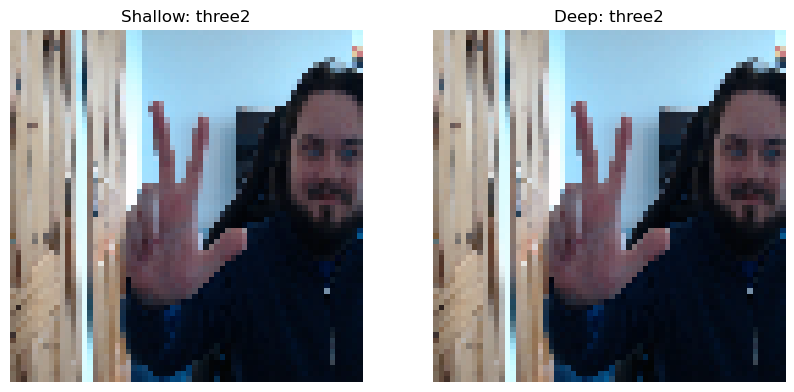

1/1 [==============================] - 0s 19ms/step
Prediction for myImages/rock.png:
    Shallow Model: rock
    Deep Model: rock


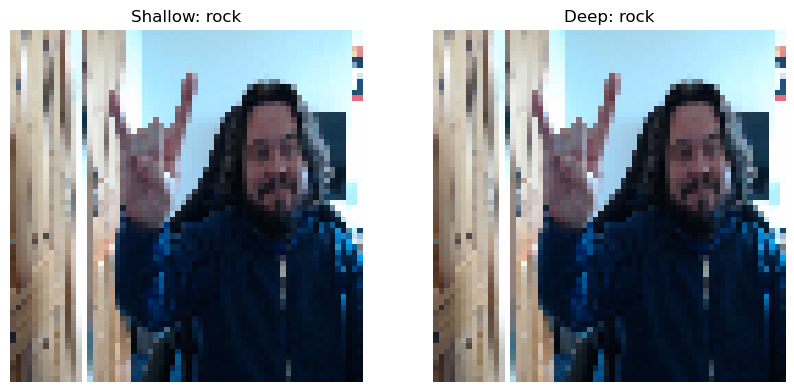

1/1 [==============================] - 0s 20ms/step
Prediction for myImages/ok.jpg:
    Shallow Model: call
    Deep Model: ok


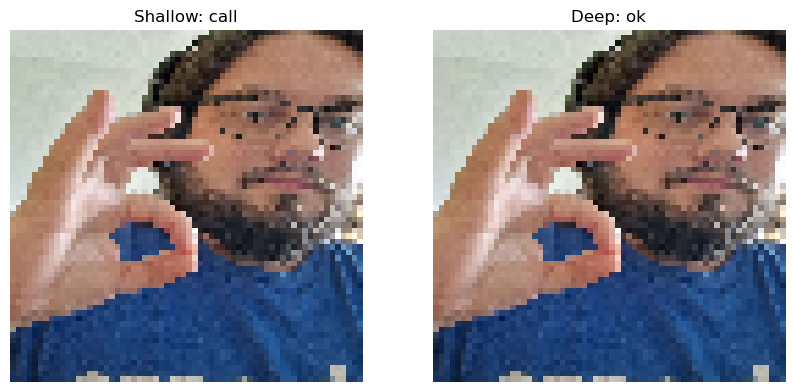

1/1 [==============================] - 0s 25ms/step
Prediction for myImages/two_up_inverted.png:
    Shallow Model: two_up_inverted
    Deep Model: two_up_inverted


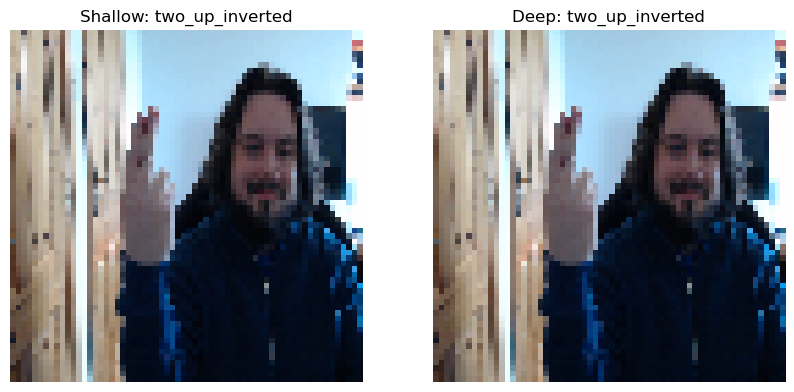

In [16]:
# Class names for prediction
class_names = ['call', 'dislike', 'fist', 'four', 'like', 'mute', 'ok', 'one', 'palm', 'peace', 'peace_inverted', 'rock', 'stop', 'stop_inverted', 'three', 'three2', 'two_up', 'two_up_inverted']

def predict_gesture(model, img_path, class_names):
    img = image.load_img(img_path, target_size=(64, 64))
    img_array = image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create a batch dimension

    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions)]
    return predicted_class, img

gesture_images = ['myImages/three2.png', 'myImages/rock.png', 'myImages/ok.jpg', 'myImages/two_up_inverted.png']

# Loop through each image, make predictions, and display results side by side
for img_path in gesture_images:
    predicted_gesture_shallow, img_shallow = predict_gesture(scratch_model_shallow, img_path, class_names)
    predicted_gesture_deep, img_deep = predict_gesture(scratch_model_deep, img_path, class_names)
    
    # Print predictions
    print(f"Prediction for {img_path}:")
    print(f"    Shallow Model: {predicted_gesture_shallow}")
    print(f"    Deep Model: {predicted_gesture_deep}")
    
    # Set up matplotlib subplot
    plt.figure(figsize=(10, 5))  
    # Display image for shallow model
    plt.subplot(1, 2, 1)  # 1 row, 2 columns, first column
    plt.imshow(image.img_to_array(img_shallow) / 255.)
    plt.title(f"Shallow: {predicted_gesture_shallow}")
    plt.axis('off')
    
    # Display image for deep model
    plt.subplot(1, 2, 2)  # 1 row, 2 columns, second column
    plt.imshow(image.img_to_array(img_deep) / 255.)
    plt.title(f"Deep: {predicted_gesture_deep}")
    plt.axis('off')
    
    plt.show()

## **CNN Models: Shallow vs Deep - Inference Time**

In [30]:
# Function to measure inference time
def measure_inference_time(model, dataset):
    start_time = time.time()
    model.evaluate(dataset)
    elapsed_time = time.time() - start_time
    return elapsed_time

# Measure the inference time
inference_time_shallow = measure_inference_time(scratch_model_shallow, test_ds_shallow)
print(f"Inference Time for Shallow Model: {inference_time_shallow:.3f} seconds")

inference_time_deep = measure_inference_time(scratch_model_deep, test_ds_deep)
print(f"Inference Time for Deep Model: {inference_time_deep:.3f} seconds")

394/394 [==============================] - 2s 3ms/step - loss: 0.8187 - accuracy: 0.7496
Inference Time for Shallow Model: 1.568 seconds
394/394 [==============================] - 2s 4ms/step - loss: 0.4036 - accuracy: 0.8826
Inference Time for Deep Model: 1.679 seconds


## **CNN Model: Shallow Calibrated vs Deep Calibrated - Classification Performances**

In [36]:
class_names = ['call','dislike','fist','four','like','mute','ok','one','palm','peace','peace_inverted','rock','stop','stop_inverted','three','three2','two_up','two_up_inverted']

def get_test_predictions(model, dataset):
    all_predictions = []
    all_labels = []
    # Redirect stdout to filter out unwanted messages during predictions
    sys.stdout = OutputFilter(sys.stdout)
    try:
        for images, labels in dataset:
            predictions = model.predict(images)
            predicted_classes = np.argmax(predictions, axis=1)
            all_predictions.extend(predicted_classes)
            # Convert one-hot labels to indices
            label_indices = np.argmax(labels, axis=1)
            all_labels.extend(label_indices)
    finally:
        # Restore the original stdout
        sys.stdout = original_stdout
    return all_labels, all_predictions

# Get predictions and true labels for shallow model
true_labels_shallow, predictions_shallow = get_test_predictions(scratch_model_shallow, test_ds_shallow)
print("Sample true labels (Shallow):", true_labels_shallow[:18])
print("Sample predictions (Shallow):", predictions_shallow[:18])

# Get predictions and true labels for deep model
true_labels_deep, predictions_deep = get_test_predictions(scratch_model_deep, test_ds_deep)
print("Sample true labels (Deep):", true_labels_deep[:18])
print("Sample predictions (Deep):", predictions_deep[:18])

# Function to format the classification report into a list of strings (one per line)
def format_classification_report(report):
    return report.split("\n")

# Generate classification reports for both models
report_shallow = classification_report(true_labels_shallow, predictions_shallow, target_names=class_names, output_dict=False)
report_deep = classification_report(true_labels_deep, predictions_deep, target_names=class_names, output_dict=False)

# Format reports for side-by-side comparison
report_shallow_lines = format_classification_report(report_shallow)
report_deep_lines = format_classification_report(report_deep)

# Find the maximum line length for the reports
max_len_shallow = max(len(line) for line in report_shallow_lines)

# Print reports side by side
print("\n\nComparison of Classification Reports")
print(f"{'Shallow Model'.center(max_len_shallow)} | {'Deep Model'}")
for line_shallow, line_deep in zip(report_shallow_lines, report_deep_lines):
    print(f"{line_shallow.ljust(max_len_shallow)} | {line_deep}")

1/1 [==============================] - ETA: 0sSample true labels (Shallow): [16, 17, 1, 13, 9, 5, 6, 7, 3, 17, 17, 4, 12, 6, 6, 1, 6, 17]
Sample predictions (Shallow): [16, 0, 1, 17, 16, 5, 11, 7, 3, 17, 4, 4, 1, 6, 6, 1, 6, 16]
1/1 [==============================] - ETA: 0sSample true labels (Deep): [16, 17, 1, 13, 9, 5, 6, 7, 3, 17, 17, 4, 12, 6, 6, 1, 6, 17]
Sample predictions (Deep): [16, 1, 0, 13, 9, 5, 6, 7, 3, 17, 4, 4, 12, 6, 6, 1, 6, 17]


Comparison of Classification Reports
                     Shallow Model                       | Deep Model
                 precision    recall  f1-score   support |                  precision    recall  f1-score   support
                                                         | 
           call       0.73      0.83      0.78       728 |            call       0.92      0.84      0.88       728
        dislike       0.79      0.85      0.82       700 |         dislike       0.93      0.93      0.93       700
           fist       0.78      

---
---
---
---
---

# **CNN Models: Shallow Calibrated vs Deep Calibrated**

### **Load the Models**

In [22]:
# Specify model history file names
shallow_calibrated_model_file = 'json/cnn_model_shallow_calibrated.json'
deep_calibrated_model_file = 'json/cnn_model_deep_calibrated.json'

# Function to load model history
def load_model_history(file_name):
    try:
        with open(file_name, 'r') as file:
            return json.load(file)
    except FileNotFoundError:
        print(f"Error: The file {file_name} does not exist.")
        return {}  # Assign an empty dictionary to prevent further errors if file is not found


In [23]:
# Load the training histories
history_shallow_calibrated = load_model_history(shallow_calibrated_model_file)
history_deep_calibrated = load_model_history(deep_calibrated_model_file)

# Access the history dictionaries
acc_shallow_calibrated = history_shallow_calibrated.get('accuracy', [])
val_acc_shallow_calibrated  = history_shallow_calibrated.get('val_accuracy', [])
loss_shallow_calibrated  = history_shallow_calibrated.get('loss', [])
val_loss_shallow_calibrated  = history_shallow_calibrated.get('val_loss', [])

acc_deep_calibrated  = history_deep_calibrated.get('accuracy', [])
val_acc_deep_calibrated  = history_deep_calibrated.get('val_accuracy', [])
loss_deep_calibrated  = history_deep_calibrated.get('loss', [])
val_loss_deep_calibrated  = history_deep_calibrated.get('val_loss', [])

# Ensure both histories have the same number of epochs
epochs  = range(1, min(len(acc_shallow_calibrated ), len(acc_deep_calibrated )) + 1)

## **CNN Model: Shallow Calibrated vs Deep Calibrated - Training and Validation Accuracy Data Visualization**

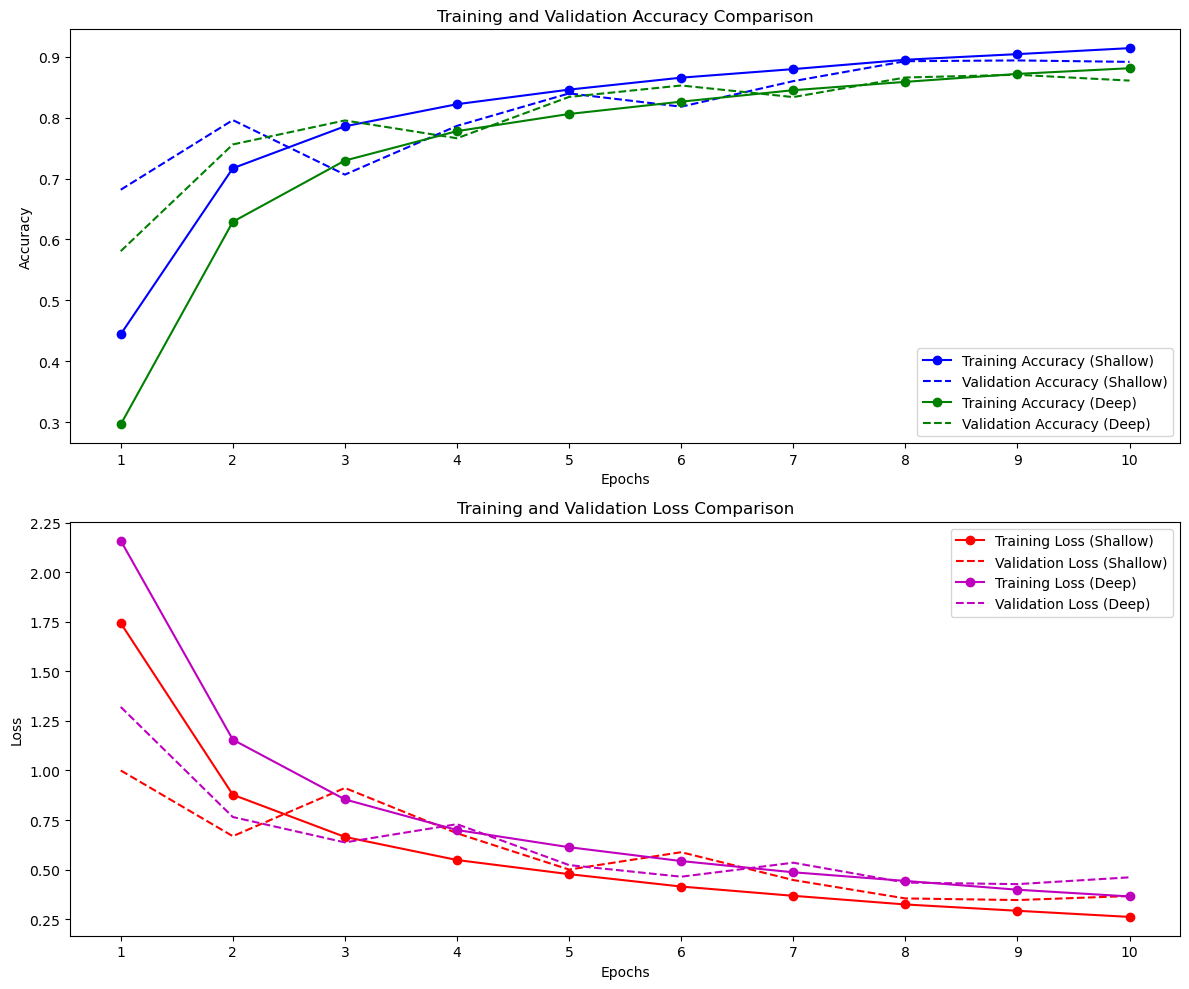

In [24]:
# Plotting
plt.figure(figsize=(12, 10))

# Accuracy subplot
plt.subplot(2, 1, 1)
plt.plot(epochs, acc_shallow_calibrated , 'bo-', label='Training Accuracy (Shallow)')
plt.plot(epochs, val_acc_shallow_calibrated , 'b--', label='Validation Accuracy (Shallow)')
plt.plot(epochs, acc_deep_calibrated , 'go-', label='Training Accuracy (Deep)')
plt.plot(epochs, val_acc_deep_calibrated , 'g--', label='Validation Accuracy (Deep)')
plt.title('Training and Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(list(epochs))  # Set x-ticks to show each epoch
plt.legend()

# Loss subplot
plt.subplot(2, 1, 2)
plt.plot(epochs, loss_shallow_calibrated , 'ro-', label='Training Loss (Shallow)')
plt.plot(epochs, val_loss_shallow_calibrated , 'r--', label='Validation Loss (Shallow)')
plt.plot(epochs, loss_deep_calibrated , 'mo-', label='Training Loss (Deep)')
plt.plot(epochs, val_loss_deep_calibrated , 'm--', label='Validation Loss (Deep)')
plt.title('Training and Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(list(epochs))  # Set x-ticks to show each epoch
plt.legend()

plt.tight_layout()
plt.show()

### **CNN Models: Shallow Calibrated vs Deep Calibrated - Epochs 1-10**

In [25]:
# Print the epoch-wise training and validation metrics for both models
print("Epoch-wise Training and Validation Metrics:")
# Ensure both models have the same number of epochs; if not, loop over the minimum of both
max_epochs = min(len(history_shallow_calibrated['accuracy']), len(history_deep_calibrated['accuracy']))
for epoch in range(max_epochs):
    print(f"Epoch {epoch+1}:")
    print(f"    Shallow Model - Training Accuracy: {history_shallow_calibrated['accuracy'][epoch]}")
    print(f"    Shallow Model - Validation Accuracy: {history_shallow_calibrated['val_accuracy'][epoch]}")
    print(f"    Shallow Model - Training Loss: {history_shallow_calibrated['loss'][epoch]}")
    print(f"    Shallow Model - Validation Loss: {history_shallow_calibrated['val_loss'][epoch]}")
    print(f"    Deep Model - Training Accuracy: {history_deep_calibrated['accuracy'][epoch]}")
    print(f"    Deep Model - Validation Accuracy: {history_deep_calibrated['val_accuracy'][epoch]}")
    print(f"    Deep Model - Training Loss: {history_deep_calibrated['loss'][epoch]}")
    print(f"    Deep Model - Validation Loss: {history_deep_calibrated['val_loss'][epoch]}")

Epoch-wise Training and Validation Metrics:
Epoch 1:
    Shallow Model - Training Accuracy: 0.4444330930709839
    Shallow Model - Validation Accuracy: 0.6815835237503052
    Shallow Model - Training Loss: 1.7436089515686035
    Shallow Model - Validation Loss: 1.0002864599227905
    Deep Model - Training Accuracy: 0.2965005338191986
    Deep Model - Validation Accuracy: 0.5807655453681946
    Deep Model - Training Loss: 2.1596548557281494
    Deep Model - Validation Loss: 1.3206974267959595
Epoch 2:
    Shallow Model - Training Accuracy: 0.7168663740158081
    Shallow Model - Validation Accuracy: 0.7959021329879761
    Shallow Model - Training Loss: 0.8778021335601807
    Shallow Model - Validation Loss: 0.6685835719108582
    Deep Model - Training Accuracy: 0.6290168762207031
    Deep Model - Validation Accuracy: 0.7559164762496948
    Deep Model - Training Loss: 1.1555733680725098
    Deep Model - Validation Loss: 0.7653332948684692
Epoch 3:
    Shallow Model - Training Accuracy: 0.

## **CNN Models: Shallow Calibrated vs Deep Calibrated - Model Predictions on myImages**

In [26]:
# Load both models
scratch_model_shallow_calibrated = load_model('h5/scratch_model_shallow_calibrated.h5')
scratch_model_deep_calibrated = load_model('h5/scratch_model_deep_calibrated.h5')

1/1 [==============================] - 0s 147ms/step
Prediction for myImages/three2.png:
    Shallow Calibrated Model: three2
    Deep Calibrated Model: three2


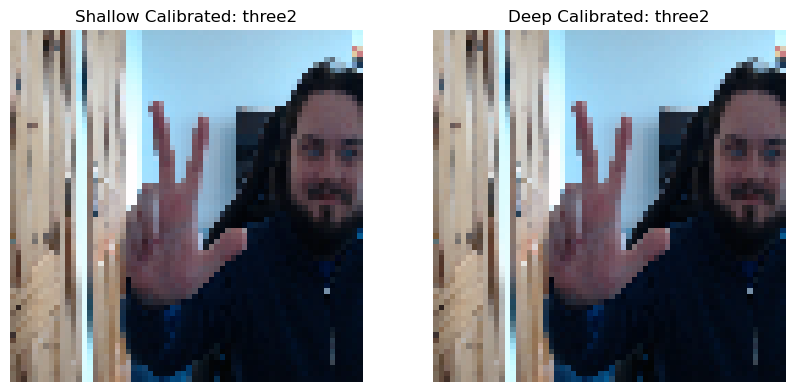

1/1 [==============================] - 0s 20ms/step
Prediction for myImages/rock.png:
    Shallow Calibrated Model: rock
    Deep Calibrated Model: rock


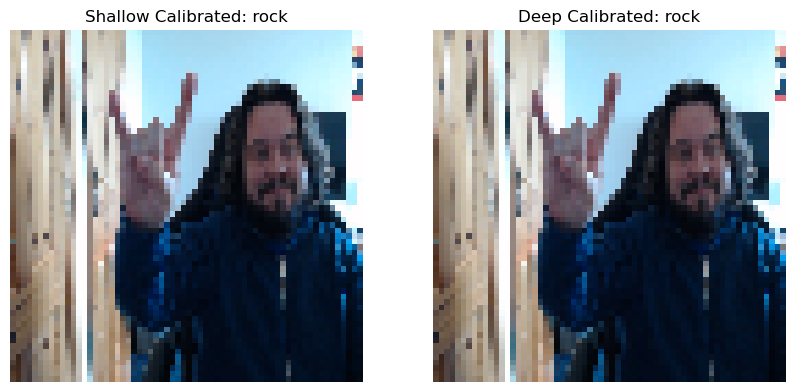

1/1 [==============================] - 0s 18ms/step
Prediction for myImages/ok.jpg:
    Shallow Calibrated Model: ok
    Deep Calibrated Model: ok


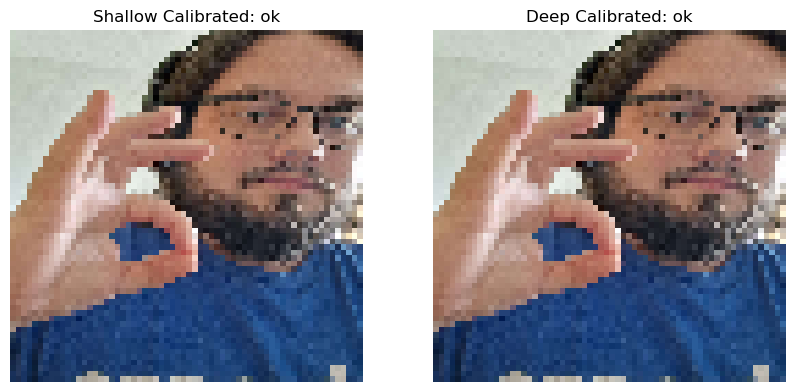

1/1 [==============================] - 0s 24ms/step
Prediction for myImages/two_up_inverted.png:
    Shallow Calibrated Model: two_up_inverted
    Deep Calibrated Model: two_up_inverted


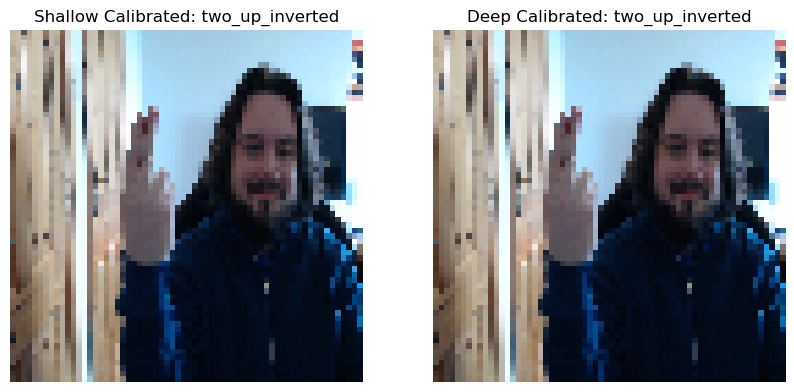

In [27]:
# Class names for prediction
class_names = ['call', 'dislike', 'fist', 'four', 'like', 'mute', 'ok', 'one', 'palm', 'peace', 'peace_inverted', 'rock', 'stop', 'stop_inverted', 'three', 'three2', 'two_up', 'two_up_inverted']

def predict_gesture(model, img_path, class_names):
    img = image.load_img(img_path, target_size=(64, 64))
    img_array = image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create a batch dimension

    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions)]
    return predicted_class, img

gesture_images = ['myImages/three2.png', 'myImages/rock.png', 'myImages/ok.jpg', 'myImages/two_up_inverted.png']

# Loop through each image, make predictions, and display results side by side
for img_path in gesture_images:
    predicted_gesture_shallow_calibrated, img_shallow = predict_gesture(scratch_model_shallow_calibrated, img_path, class_names)
    predicted_gesture_deep_calibrated, img_deep = predict_gesture(scratch_model_deep_calibrated, img_path, class_names)
    
    # Print predictions
    print(f"Prediction for {img_path}:")
    print(f"    Shallow Calibrated Model: {predicted_gesture_shallow_calibrated}")
    print(f"    Deep Calibrated Model: {predicted_gesture_deep_calibrated}")
    
    # Set up matplotlib subplot
    plt.figure(figsize=(10, 5))  
    # Display image for shallow model
    plt.subplot(1, 2, 1)  # 1 row, 2 columns, first column
    plt.imshow(image.img_to_array(img_shallow) / 255.)
    plt.title(f"Shallow Calibrated: {predicted_gesture_shallow_calibrated}")
    plt.axis('off')
    
    # Display image for deep model
    plt.subplot(1, 2, 2)  # 1 row, 2 columns, second column
    plt.imshow(image.img_to_array(img_deep) / 255.)
    plt.title(f"Deep Calibrated: {predicted_gesture_deep_calibrated}")
    plt.axis('off')
    
    plt.show()

## **CNN Models: Shallow Calibrated vs Deep Calibrated - Inference Time**

In [31]:
# Function to measure inference time
def measure_inference_time(model, dataset):
    start_time = time.time()
    model.evaluate(dataset)
    elapsed_time = time.time() - start_time
    return elapsed_time

# Measure the inference time
inference_time_shallow_calibrated = measure_inference_time(scratch_model_shallow_calibrated, test_ds_shallow)
print(f"Inference Time for Shallow Model: {inference_time_shallow_calibrated:.3f} seconds")

inference_time_deep_calibrated = measure_inference_time(scratch_model_deep_calibrated, test_ds_deep)
print(f"Inference Time for Deep Model: {inference_time_deep_calibrated:.3f} seconds")

394/394 [==============================] - 2s 4ms/step - loss: 0.3594 - accuracy: 0.8924
Inference Time for Shallow Model: 2.216 seconds
394/394 [==============================] - 2s 5ms/step - loss: 0.4778 - accuracy: 0.8591
Inference Time for Deep Model: 2.083 seconds


## **CNN Model: Shallow Calibrated vs Deep Calibrated - Classification Performances**

In [35]:
class_names = ['call','dislike','fist','four','like','mute','ok','one','palm','peace','peace_inverted','rock','stop','stop_inverted','three','three2','two_up','two_up_inverted']

def get_test_predictions(model, dataset):
    all_predictions = []
    all_labels = []
    # Redirect stdout to filter out unwanted messages during predictions
    sys.stdout = OutputFilter(sys.stdout)
    try:
        for images, labels in dataset:
            predictions = model.predict(images)
            predicted_classes = np.argmax(predictions, axis=1)
            all_predictions.extend(predicted_classes)
            # Convert one-hot labels to indices
            label_indices = np.argmax(labels, axis=1)
            all_labels.extend(label_indices)
    finally:
        # Restore the original stdout
        sys.stdout = original_stdout
    return all_labels, all_predictions

# Get predictions and true labels for shallow model
true_labels_shallow, predictions_shallow = get_test_predictions(scratch_model_shallow_calibrated, test_ds_shallow)
print("Sample true labels (Shallow Calibrated):", true_labels_shallow[:18])
print("Sample predictions (Shallow Calibrated):", predictions_shallow[:18])

# Get predictions and true labels for deep model
true_labels_deep, predictions_deep = get_test_predictions(scratch_model_deep_calibrated, test_ds_deep)
print("Sample true labels (Deep Calibrated):", true_labels_deep[:18])
print("Sample predictions (Deep Calibrated):", predictions_deep[:18])

# Function to format the classification report into a list of strings (one per line)
def format_classification_report(report):
    return report.split("\n")

# Generate classification reports for both models
report_shallow = classification_report(true_labels_shallow, predictions_shallow, target_names=class_names, output_dict=False)
report_deep = classification_report(true_labels_deep, predictions_deep, target_names=class_names, output_dict=False)

# Format reports for side-by-side comparison
report_shallow_lines = format_classification_report(report_shallow)
report_deep_lines = format_classification_report(report_deep)

# Find the maximum line length for the reports
max_len_shallow = max(len(line) for line in report_shallow_lines)

# Print reports side by side
print("\n\nComparison of Classification Reports")
print(f"{'Shallow Model Calibrated'.center(max_len_shallow)} | {'Deep Model Calibrated'}")
for line_shallow, line_deep in zip(report_shallow_lines, report_deep_lines):
    print(f"{line_shallow.ljust(max_len_shallow)} | {line_deep}")

1/1 [==============================] - ETA: 0sSample true labels (Shallow Calibrated): [16, 17, 1, 13, 9, 5, 6, 7, 3, 17, 17, 4, 12, 6, 6, 1, 6, 17]
Sample predictions (Shallow Calibrated): [16, 0, 1, 13, 9, 5, 6, 7, 3, 17, 4, 4, 1, 6, 6, 1, 6, 17]
1/1 [==============================] - ETA: 0sSample true labels (Deep Calibrated): [16, 17, 1, 13, 9, 5, 6, 7, 3, 17, 17, 4, 12, 6, 6, 1, 6, 17]
Sample predictions (Deep Calibrated): [16, 0, 1, 13, 9, 5, 6, 7, 3, 17, 17, 4, 12, 6, 6, 1, 6, 17]


Comparison of Classification Reports
                Shallow Model Calibrated                 | Deep Model Calibrated
                 precision    recall  f1-score   support |                  precision    recall  f1-score   support
                                                         | 
           call       0.87      0.92      0.90       728 |            call       0.85      0.91      0.88       728
        dislike       0.90      0.94      0.92       700 |         dislike       0.90      0.9

---
---
---
---
---

# **CNN Models: Shallow Calibrated Data Augmentation vs Deep Calibrated Data Augmentation**

### **Load the Models**

In [37]:
# Specify model history file names
shallow_calibrated_da_model_file = 'json/cnn_model_shallow_calibrated_da.json'
deep_calibrated_da_model_file = 'json/cnn_model_deep_calibrated_da.json'

# Function to load model history
def load_model_history(file_name):
    try:
        with open(file_name, 'r') as file:
            return json.load(file)
    except FileNotFoundError:
        print(f"Error: The file {file_name} does not exist.")
        return {}  # Assign an empty dictionary to prevent further errors if file is not found


In [38]:
# Load the training histories
history_shallow_calibrated_da = load_model_history(shallow_calibrated_da_model_file)
history_deep_calibrated_da = load_model_history(deep_calibrated_da_model_file)

# Access the history dictionaries
acc_shallow_calibrated_da = history_shallow_calibrated_da.get('accuracy', [])
val_acc_shallow_calibrated_da  = history_shallow_calibrated_da.get('val_accuracy', [])
loss_shallow_calibrated_da  = history_shallow_calibrated_da.get('loss', [])
val_loss_shallow_calibrated_da  = history_shallow_calibrated_da.get('val_loss', [])

acc_deep_calibrated_da  = history_deep_calibrated_da.get('accuracy', [])
val_acc_deep_calibrated_da  = history_deep_calibrated_da.get('val_accuracy', [])
loss_deep_calibrated_da  = history_deep_calibrated_da.get('loss', [])
val_loss_deep_calibrated_da  = history_deep_calibrated_da.get('val_loss', [])

# Ensure both histories have the same number of epochs
epochs  = range(1, min(len(acc_shallow_calibrated_da ), len(acc_deep_calibrated )) + 1)

## **CNN Model: Shallow Calibrated Data Augmentation vs Deep Calibrated Data Augmentation - Training and Validation Accuracy Data Visualization**

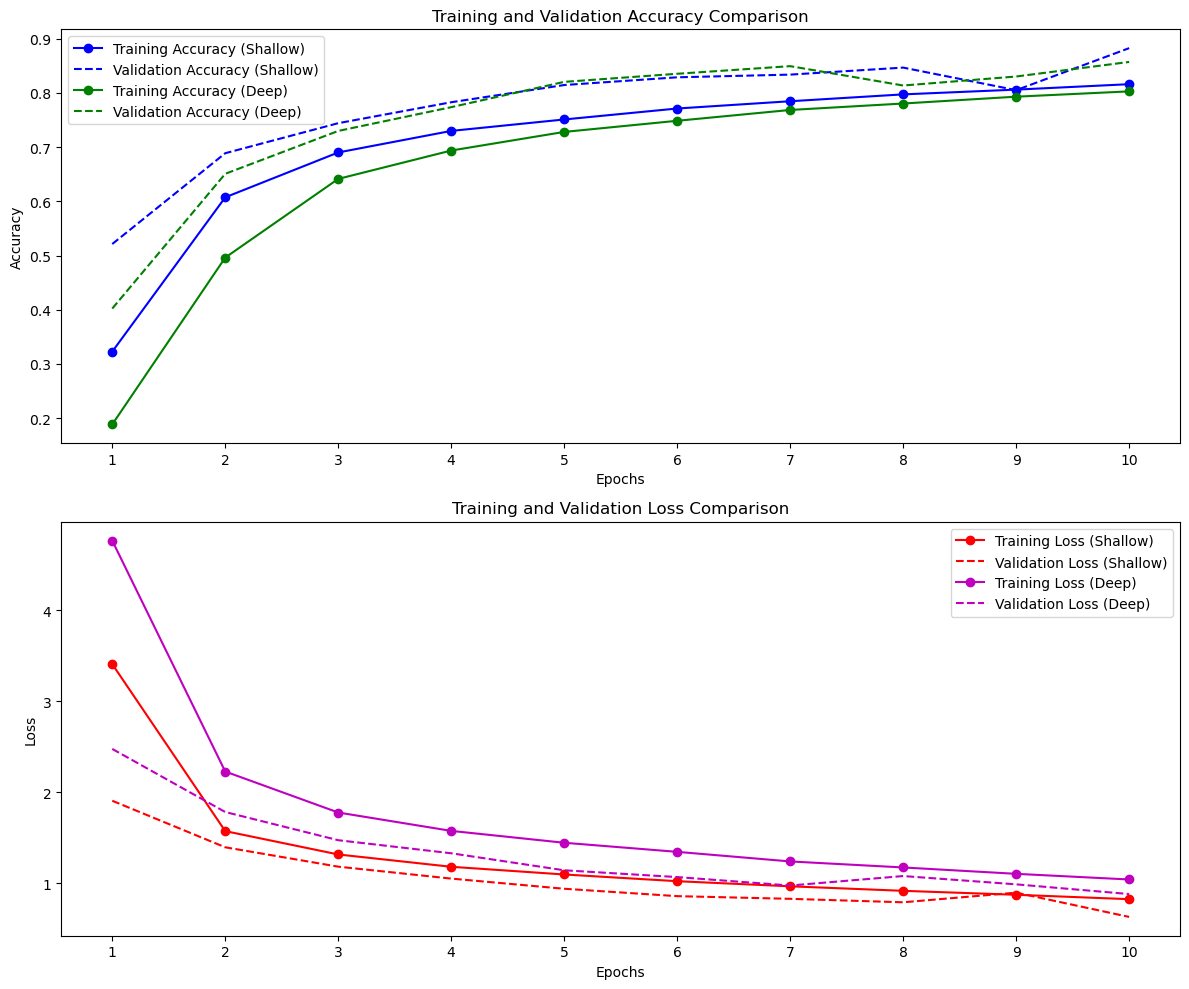

In [39]:
# Plotting
plt.figure(figsize=(12, 10))

# Accuracy subplot
plt.subplot(2, 1, 1)
plt.plot(epochs, acc_shallow_calibrated_da , 'bo-', label='Training Accuracy (Shallow)')
plt.plot(epochs, val_acc_shallow_calibrated_da , 'b--', label='Validation Accuracy (Shallow)')
plt.plot(epochs, acc_deep_calibrated_da , 'go-', label='Training Accuracy (Deep)')
plt.plot(epochs, val_acc_deep_calibrated_da , 'g--', label='Validation Accuracy (Deep)')
plt.title('Training and Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(list(epochs))  # Set x-ticks to show each epoch
plt.legend()

# Loss subplot
plt.subplot(2, 1, 2)
plt.plot(epochs, loss_shallow_calibrated_da , 'ro-', label='Training Loss (Shallow)')
plt.plot(epochs, val_loss_shallow_calibrated_da , 'r--', label='Validation Loss (Shallow)')
plt.plot(epochs, loss_deep_calibrated_da , 'mo-', label='Training Loss (Deep)')
plt.plot(epochs, val_loss_deep_calibrated_da , 'm--', label='Validation Loss (Deep)')
plt.title('Training and Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(list(epochs))  # Set x-ticks to show each epoch
plt.legend()

plt.tight_layout()
plt.show()

### **CNN Models: Shallow Calibrated Data Augmentation vs Deep Calibrated Data Augmentation - Epochs 1-10**

In [40]:
# Print the epoch-wise training and validation metrics for both models
print("Epoch-wise Training and Validation Metrics:")
# Ensure both models have the same number of epochs; if not, loop over the minimum of both
max_epochs = min(len(history_shallow_calibrated_da['accuracy']), len(history_deep_calibrated_da['accuracy']))
for epoch in range(max_epochs):
    print(f"Epoch {epoch+1}:")
    print(f"    Shallow Model - Training Accuracy: {history_shallow_calibrated_da['accuracy'][epoch]}")
    print(f"    Shallow Model - Validation Accuracy: {history_shallow_calibrated_da['val_accuracy'][epoch]}")
    print(f"    Shallow Model - Training Loss: {history_shallow_calibrated_da['loss'][epoch]}")
    print(f"    Shallow Model - Validation Loss: {history_shallow_calibrated_da['val_loss'][epoch]}")
    print(f"    Deep Model - Training Accuracy: {history_deep_calibrated_da['accuracy'][epoch]}")
    print(f"    Deep Model - Validation Accuracy: {history_deep_calibrated_da['val_accuracy'][epoch]}")
    print(f"    Deep Model - Training Loss: {history_deep_calibrated_da['loss'][epoch]}")
    print(f"    Deep Model - Validation Loss: {history_deep_calibrated_da['val_loss'][epoch]}")

Epoch-wise Training and Validation Metrics:
Epoch 1:
    Shallow Model - Training Accuracy: 0.32271242141723633
    Shallow Model - Validation Accuracy: 0.5212833285331726
    Shallow Model - Training Loss: 3.408087968826294
    Shallow Model - Validation Loss: 1.9072085618972778
    Deep Model - Training Accuracy: 0.188407763838768
    Deep Model - Validation Accuracy: 0.402160108089447
    Deep Model - Training Loss: 4.76388692855835
    Deep Model - Validation Loss: 2.476327657699585
Epoch 2:
    Shallow Model - Training Accuracy: 0.6074686646461487
    Shallow Model - Validation Accuracy: 0.6888500452041626
    Shallow Model - Training Loss: 1.5737303495407104
    Shallow Model - Validation Loss: 1.3961262702941895
    Deep Model - Training Accuracy: 0.4962213933467865
    Deep Model - Validation Accuracy: 0.6508497595787048
    Deep Model - Training Loss: 2.227999687194824
    Deep Model - Validation Loss: 1.7834813594818115
Epoch 3:
    Shallow Model - Training Accuracy: 0.690257

## **CNN Models: Shallow Calibrated Data Augmentation vs Deep Calibrated Data Augmentation - Model Predictions on myImages**

In [41]:
# Load both models
scratch_model_shallow_calibrated_da = load_model('h5/scratch_model_shallow_calibrated_da.h5')
scratch_model_deep_calibrated_da = load_model('h5/scratch_model_deep_calibrated_da.h5')

1/1 [==============================] - 0s 212ms/step
Prediction for myImages/three2.png:
    Shallow Calibrated Data Augmentation Model: three2
    Deep Calibrated Data Augmentation Model: three2


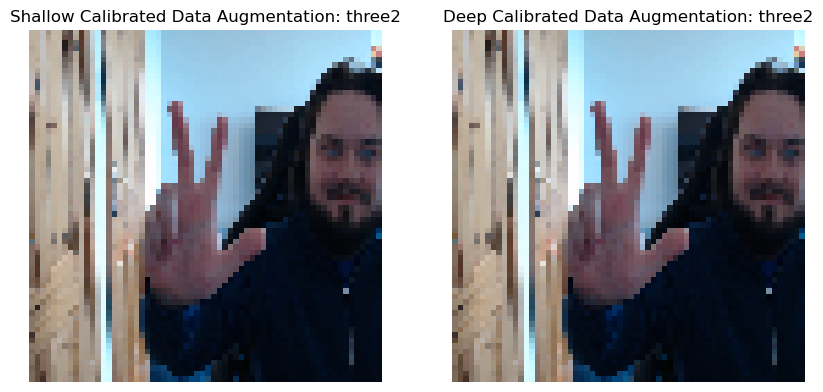

1/1 [==============================] - 0s 22ms/step
Prediction for myImages/rock.png:
    Shallow Calibrated Data Augmentation Model: rock
    Deep Calibrated Data Augmentation Model: rock


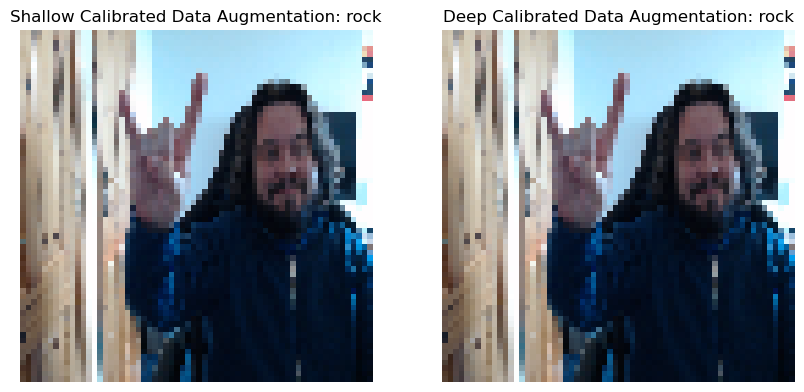

1/1 [==============================] - 0s 24ms/step
Prediction for myImages/ok.jpg:
    Shallow Calibrated Data Augmentation Model: ok
    Deep Calibrated Data Augmentation Model: call


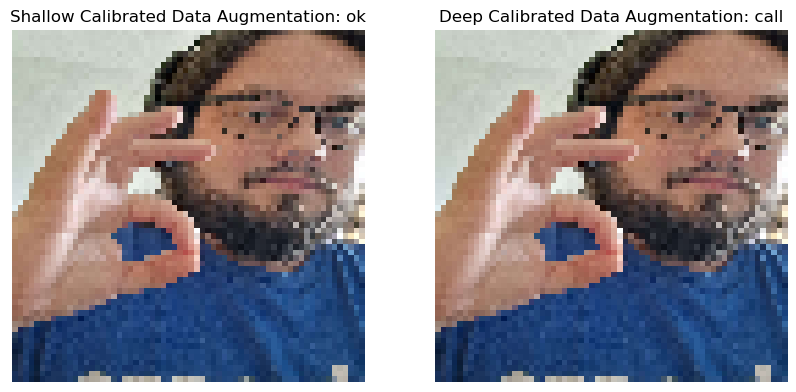

1/1 [==============================] - 0s 19ms/step
Prediction for myImages/two_up_inverted.png:
    Shallow Calibrated Data Augmentation Model: two_up_inverted
    Deep Calibrated Data Augmentation Model: two_up_inverted


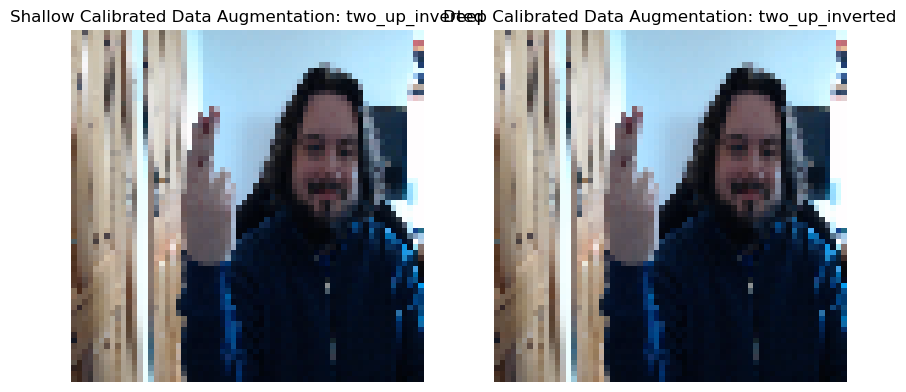

In [42]:
# Class names for prediction
class_names = ['call', 'dislike', 'fist', 'four', 'like', 'mute', 'ok', 'one', 'palm', 'peace', 'peace_inverted', 'rock', 'stop', 'stop_inverted', 'three', 'three2', 'two_up', 'two_up_inverted']

def predict_gesture(model, img_path, class_names):
    img = image.load_img(img_path, target_size=(64, 64))
    img_array = image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create a batch dimension

    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions)]
    return predicted_class, img

gesture_images = ['myImages/three2.png', 'myImages/rock.png', 'myImages/ok.jpg', 'myImages/two_up_inverted.png']

# Loop through each image, make predictions, and display results side by side
for img_path in gesture_images:
    predicted_gesture_shallow_calibrated_da, img_shallow = predict_gesture(scratch_model_shallow_calibrated_da, img_path, class_names)
    predicted_gesture_deep_calibrated_da, img_deep = predict_gesture(scratch_model_deep_calibrated_da, img_path, class_names)
    
    # Print predictions
    print(f"Prediction for {img_path}:")
    print(f"    Shallow Calibrated Data Augmentation Model: {predicted_gesture_shallow_calibrated_da}")
    print(f"    Deep Calibrated Data Augmentation Model: {predicted_gesture_deep_calibrated_da}")
    
    # Set up matplotlib subplot
    plt.figure(figsize=(10, 5)) 
    # Display image for shallow model
    plt.subplot(1, 2, 1)  # 1 row, 2 columns, first column
    plt.imshow(image.img_to_array(img_shallow) / 255.)
    plt.title(f"Shallow Calibrated Data Augmentation: {predicted_gesture_shallow_calibrated_da}")
    plt.axis('off')
    
    # Display image for deep model
    plt.subplot(1, 2, 2)  # 1 row, 2 columns, second column
    plt.imshow(image.img_to_array(img_deep) / 255.)
    plt.title(f"Deep Calibrated Data Augmentation: {predicted_gesture_deep_calibrated_da}")
    plt.axis('off')
    
    plt.show()

## **CNN Models: Shallow Calibrated Data Augmentation vs Deep Calibrated Data Augmentation - Inference Time**

In [43]:
# Function to measure inference time
def measure_inference_time(model, dataset):
    start_time = time.time()
    model.evaluate(dataset)
    elapsed_time = time.time() - start_time
    return elapsed_time

# Measure the inference time
inference_time_shallow_calibrated_da = measure_inference_time(scratch_model_shallow_calibrated_da, test_ds_shallow)
print(f"Inference Time for Shallow Model: {inference_time_shallow_calibrated_da:.3f} seconds")

inference_time_deep_calibrated_da = measure_inference_time(scratch_model_deep_calibrated_da, test_ds_deep)
print(f"Inference Time for Deep Model: {inference_time_deep_calibrated_da:.3f} seconds")

394/394 [==============================] - 2s 5ms/step - loss: 0.6332 - accuracy: 0.8852
Inference Time for Shallow Model: 2.257 seconds
394/394 [==============================] - 3s 6ms/step - loss: 0.8955 - accuracy: 0.8529
Inference Time for Deep Model: 2.803 seconds


## **CNN Model: Shallow Calibrated Data Augmentation vs Deep Calibrated Data Augmentation- Classification Performances**

In [44]:
class_names = ['call','dislike','fist','four','like','mute','ok','one','palm','peace','peace_inverted','rock','stop','stop_inverted','three','three2','two_up','two_up_inverted']

def get_test_predictions(model, dataset):
    all_predictions = []
    all_labels = []
    # Redirect stdout to filter out unwanted messages during predictions
    sys.stdout = OutputFilter(sys.stdout)
    try:
        for images, labels in dataset:
            predictions = model.predict(images)
            predicted_classes = np.argmax(predictions, axis=1)
            all_predictions.extend(predicted_classes)
            # Convert one-hot labels to indices
            label_indices = np.argmax(labels, axis=1)
            all_labels.extend(label_indices)
    finally:
        # Restore the original stdout
        sys.stdout = original_stdout
    return all_labels, all_predictions

# Get predictions and true labels for shallow model
true_labels_shallow, predictions_shallow = get_test_predictions(scratch_model_shallow_calibrated_da, test_ds_shallow)
print("Sample true labels (Shallow Calibrated Data Augmentation):", true_labels_shallow[:18])
print("Sample predictions (Shallow Calibrated Data Augmentation):", predictions_shallow[:18])

# Get predictions and true labels for deep model
true_labels_deep, predictions_deep = get_test_predictions(scratch_model_deep_calibrated_da, test_ds_deep)
print("Sample true labels (Deep Calibrated Data Augmentation):", true_labels_deep[:18])
print("Sample predictions (Deep Calibrated Data Augmentation):", predictions_deep[:18])

# Function to format the classification report into a list of strings (one per line)
def format_classification_report(report):
    return report.split("\n")

# Generate classification reports for both models
report_shallow = classification_report(true_labels_shallow, predictions_shallow, target_names=class_names, output_dict=False)
report_deep = classification_report(true_labels_deep, predictions_deep, target_names=class_names, output_dict=False)

# Format reports for side-by-side comparison
report_shallow_lines = format_classification_report(report_shallow)
report_deep_lines = format_classification_report(report_deep)

# Find the maximum line length for the reports
max_len_shallow = max(len(line) for line in report_shallow_lines)

# Print reports side by side
print("\n\nComparison of Classification Reports")
print(f"{'Shallow Model Calibrated Data Augmentation'.center(max_len_shallow)} | {'Deep Model Calibrated Data Augmentation'}")
for line_shallow, line_deep in zip(report_shallow_lines, report_deep_lines):
    print(f"{line_shallow.ljust(max_len_shallow)} | {line_deep}")

1/1 [==============================] - ETA: 0sSample true labels (Shallow Calibrated Data Augmentation): [16, 17, 1, 13, 9, 5, 6, 7, 3, 17, 17, 4, 12, 6, 6, 1, 6, 17]
Sample predictions (Shallow Calibrated Data Augmentation): [16, 17, 1, 13, 9, 5, 6, 7, 3, 17, 0, 4, 8, 6, 6, 1, 6, 17]
1/1 [==============================] - ETA: 0sSample true labels (Deep Calibrated Data Augmentation): [16, 17, 1, 13, 9, 5, 6, 7, 3, 17, 17, 4, 12, 6, 6, 1, 6, 17]
Sample predictions (Deep Calibrated Data Augmentation): [16, 12, 5, 13, 9, 5, 6, 7, 3, 17, 1, 4, 12, 6, 6, 1, 6, 17]


Comparison of Classification Reports
       Shallow Model Calibrated Data Augmentation        | Deep Model Calibrated Data Augmentation
                 precision    recall  f1-score   support |                  precision    recall  f1-score   support
                                                         | 
           call       0.90      0.87      0.88       728 |            call       0.89      0.87      0.88       728
   

---
---
---
---
---

# **CNN Models: Shallow Grayscale vs Deep Grayscale**

### **Load the Models**

In [9]:
# Specify model history file names
shallow_grayscale_model_file = 'json/cnn_model_shallow_grayscale.json'
deep_grayscale_model_file = 'json/cnn_model_deep_grayscale.json'

# Function to load model history
def load_model_history(file_name):
    try:
        with open(file_name, 'r') as file:
            return json.load(file)
    except FileNotFoundError:
        print(f"Error: The file {file_name} does not exist.")
        return {}  # Assign an empty dictionary to prevent further errors if file is not found


In [10]:
# Load the training histories
history_shallow_grayscale = load_model_history(shallow_grayscale_model_file)
history_deep_grayscale = load_model_history(deep_grayscale_model_file)

# Access the history dictionaries
acc_shallow_grayscale = history_shallow_grayscale.get('accuracy', [])
val_acc_shallow_grayscale  = history_shallow_grayscale.get('val_accuracy', [])
loss_shallow_grayscale  = history_shallow_grayscale.get('loss', [])
val_loss_shallow_grayscale  = history_shallow_grayscale.get('val_loss', [])

acc_deep_grayscale  = history_deep_grayscale.get('accuracy', [])
val_acc_deep_grayscale  = history_deep_grayscale.get('val_accuracy', [])
loss_deep_grayscale  = history_deep_grayscale.get('loss', [])
val_loss_deep_grayscale  = history_deep_grayscale.get('val_loss', [])

# Ensure both histories have the same number of epochs
epochs  = range(1, min(len(acc_shallow_grayscale ), len(acc_deep_grayscale)) + 1)

## **CNN Model: Shallow Grayscale vs Deep Grayscale - Training and Validation Accuracy Data Visualization**

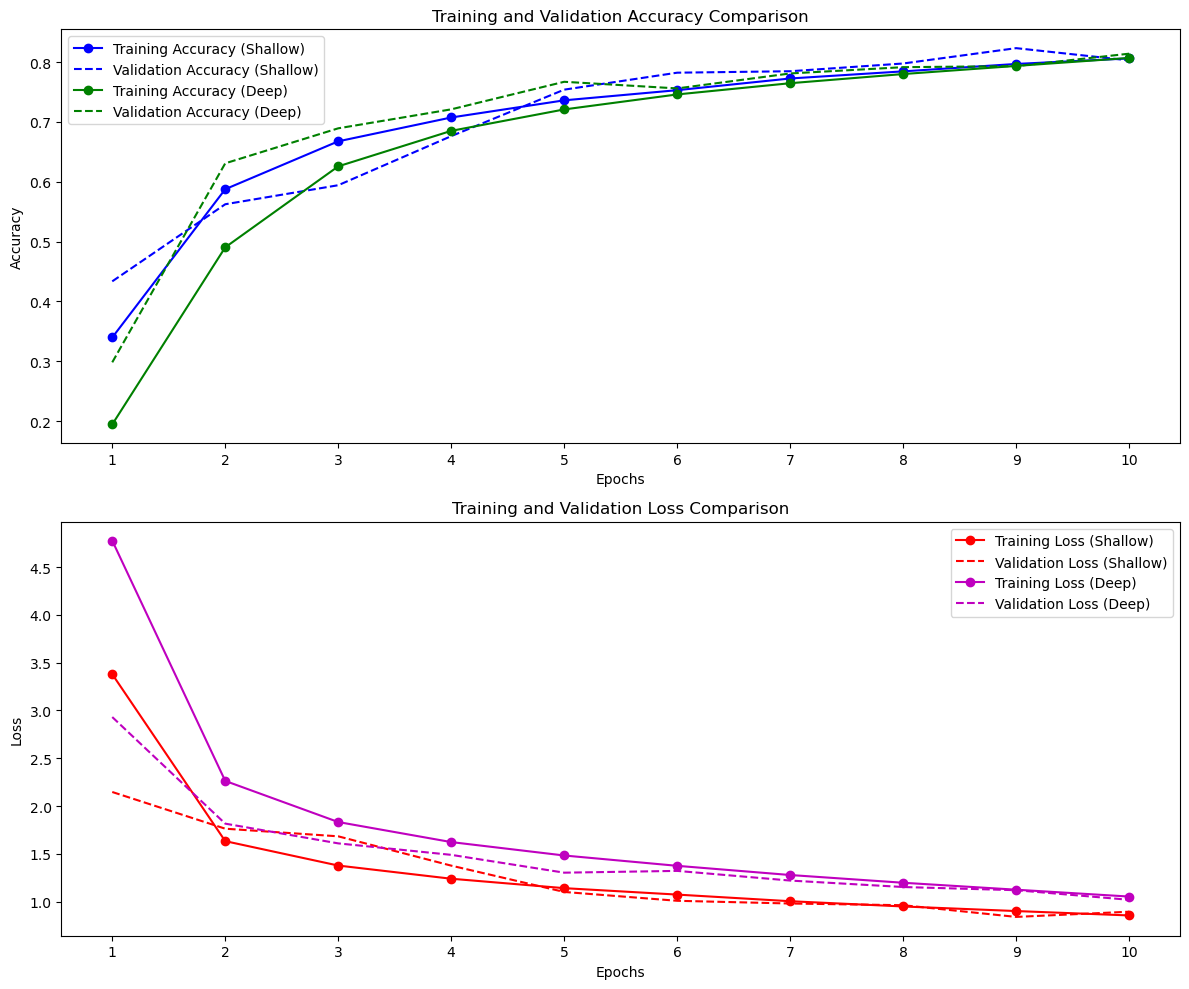

In [11]:
# Plotting
plt.figure(figsize=(12, 10))

# Accuracy subplot
plt.subplot(2, 1, 1)
plt.plot(epochs, acc_shallow_grayscale , 'bo-', label='Training Accuracy (Shallow)')
plt.plot(epochs, val_acc_shallow_grayscale , 'b--', label='Validation Accuracy (Shallow)')
plt.plot(epochs, acc_deep_grayscale , 'go-', label='Training Accuracy (Deep)')
plt.plot(epochs, val_acc_deep_grayscale , 'g--', label='Validation Accuracy (Deep)')
plt.title('Training and Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(list(epochs))  # Set x-ticks to show each epoch
plt.legend()

# Loss subplot
plt.subplot(2, 1, 2)
plt.plot(epochs, loss_shallow_grayscale , 'ro-', label='Training Loss (Shallow)')
plt.plot(epochs, val_loss_shallow_grayscale , 'r--', label='Validation Loss (Shallow)')
plt.plot(epochs, loss_deep_grayscale , 'mo-', label='Training Loss (Deep)')
plt.plot(epochs, val_loss_deep_grayscale , 'm--', label='Validation Loss (Deep)')
plt.title('Training and Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(list(epochs))  # Set x-ticks to show each epoch
plt.legend()

plt.tight_layout()
plt.show()

### **CNN Models: Shallow Grayscale vs Deep Grayscale - Epochs 1-10**

In [12]:
# Print the epoch-wise training and validation metrics for both models
print("Epoch-wise Training and Validation Metrics:")
# Ensure both models have the same number of epochs; if not, loop over the minimum of both
max_epochs = min(len(history_shallow_grayscale['accuracy']), len(history_deep_grayscale['accuracy']))
for epoch in range(max_epochs):
    print(f"Epoch {epoch+1}:")
    print(f"    Shallow Model - Training Accuracy: {history_shallow_grayscale['accuracy'][epoch]}")
    print(f"    Shallow Model - Validation Accuracy: {history_shallow_grayscale['val_accuracy'][epoch]}")
    print(f"    Shallow Model - Training Loss: {history_shallow_grayscale['loss'][epoch]}")
    print(f"    Shallow Model - Validation Loss: {history_shallow_grayscale['val_loss'][epoch]}")
    print(f"    Deep Model - Training Accuracy: {history_deep_grayscale['accuracy'][epoch]}")
    print(f"    Deep Model - Validation Accuracy: {history_deep_grayscale['val_accuracy'][epoch]}")
    print(f"    Deep Model - Training Loss: {history_deep_grayscale['loss'][epoch]}")
    print(f"    Deep Model - Validation Loss: {history_deep_grayscale['val_loss'][epoch]}")

Epoch-wise Training and Validation Metrics:
Epoch 1:
    Shallow Model - Training Accuracy: 0.339665025472641
    Shallow Model - Validation Accuracy: 0.43352922797203064
    Shallow Model - Training Loss: 3.379716396331787
    Shallow Model - Validation Loss: 2.1469645500183105
    Deep Model - Training Accuracy: 0.19439905881881714
    Deep Model - Validation Accuracy: 0.298165500164032
    Deep Model - Training Loss: 4.777578830718994
    Deep Model - Validation Loss: 2.931267499923706
Epoch 2:
    Shallow Model - Training Accuracy: 0.5875317454338074
    Shallow Model - Validation Accuracy: 0.562380850315094
    Shallow Model - Training Loss: 1.6325513124465942
    Shallow Model - Validation Loss: 1.7628297805786133
    Deep Model - Training Accuracy: 0.49036628007888794
    Deep Model - Validation Accuracy: 0.6307973265647888
    Deep Model - Training Loss: 2.2628421783447266
    Deep Model - Validation Loss: 1.8156670331954956
Epoch 3:
    Shallow Model - Training Accuracy: 0.667

## **CNN Models: Shallow Grayscale vs Deep Grayscale - Model Predictions on myImages**

In [13]:
# Load both models
scratch_model_shallow_grayscale = load_model('h5/scratch_model_shallow_grayscale.h5')
scratch_model_deep_grayscale = load_model('h5/scratch_model_deep_grayscale.h5')

1/1 [==============================] - 0s 220ms/step
Prediction for myImages/three2.png:
    Shallow Grayscale Model: three2
    Deep Grayscale Model: three2


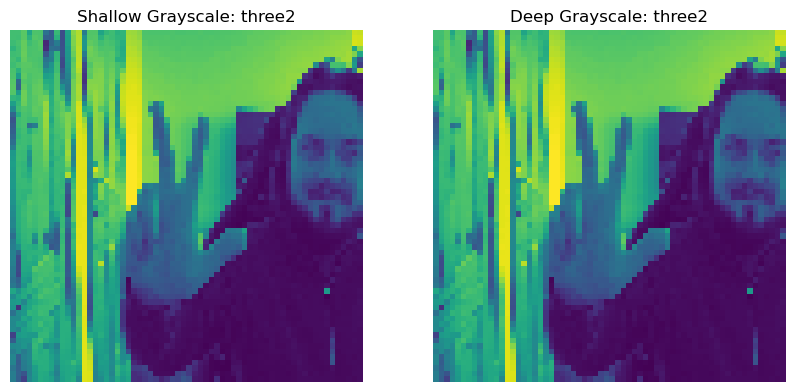

1/1 [==============================] - 0s 26ms/step
Prediction for myImages/rock.png:
    Shallow Grayscale Model: rock
    Deep Grayscale Model: rock


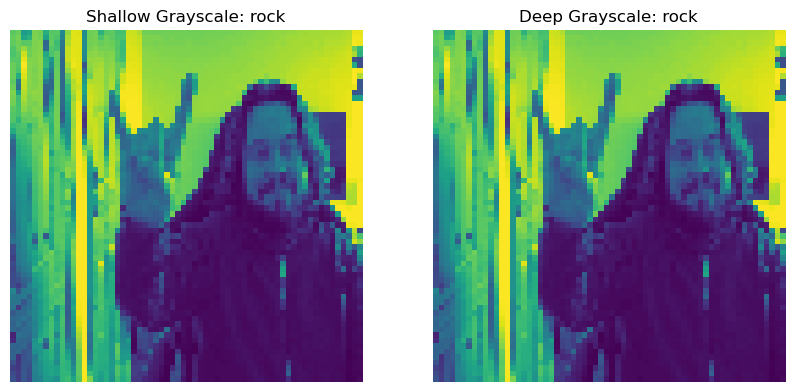

1/1 [==============================] - 0s 22ms/step
Prediction for myImages/ok.jpg:
    Shallow Grayscale Model: call
    Deep Grayscale Model: call


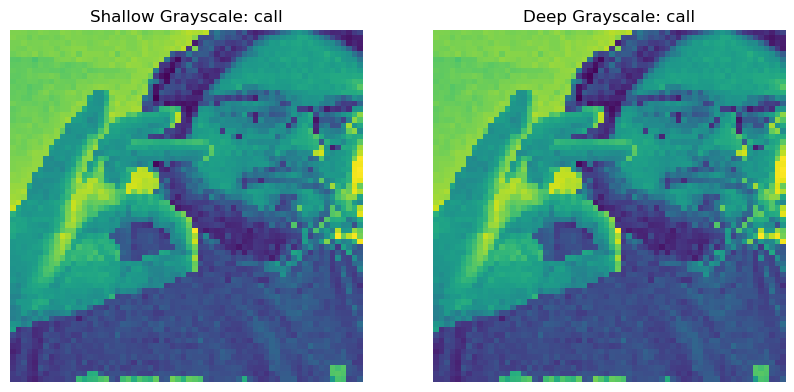

1/1 [==============================] - 0s 19ms/step
Prediction for myImages/two_up_inverted.png:
    Shallow Grayscale Model: two_up_inverted
    Deep Grayscale Model: two_up_inverted


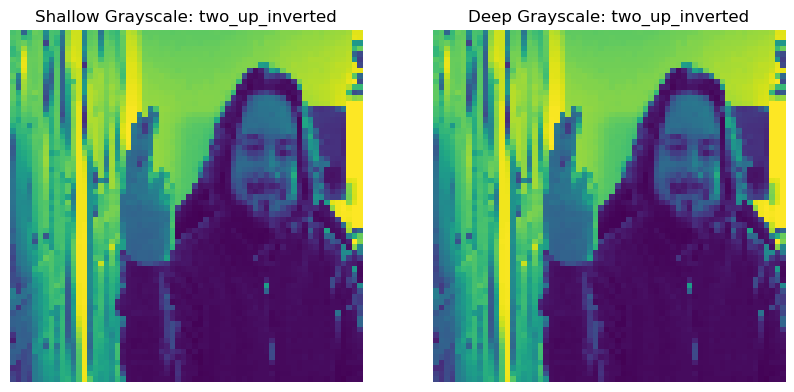

In [16]:
# Class names for prediction
class_names = ['call', 'dislike', 'fist', 'four', 'like', 'mute', 'ok', 'one', 'palm', 'peace', 'peace_inverted', 'rock', 'stop', 'stop_inverted', 'three', 'three2', 'two_up', 'two_up_inverted']

def predict_gesture(model, img_path, class_names):
    img = image.load_img(img_path, color_mode='grayscale', target_size=(64, 64))
    img_array = image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create a batch dimension

    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions)]
    return predicted_class, img

gesture_images = ['myImages/three2.png', 'myImages/rock.png', 'myImages/ok.jpg', 'myImages/two_up_inverted.png']

# Loop through each image, make predictions, and display results side by side
for img_path in gesture_images:
    predicted_gesture_shallow_grayscale, img_shallow = predict_gesture(scratch_model_shallow_grayscale, img_path, class_names)
    predicted_gesture_deep_grayscale, img_deep = predict_gesture(scratch_model_deep_grayscale, img_path, class_names)
    
    # Print predictions
    print(f"Prediction for {img_path}:")
    print(f"    Shallow Grayscale Model: {predicted_gesture_shallow_grayscale}")
    print(f"    Deep Grayscale Model: {predicted_gesture_deep_grayscale}")
    
    # Set up matplotlib subplot
    plt.figure(figsize=(10, 5))  
    # Display image for shallow model
    plt.subplot(1, 2, 1)  # 1 row, 2 columns, first column
    plt.imshow(image.img_to_array(img_shallow) / 255.)
    plt.title(f"Shallow Grayscale: {predicted_gesture_shallow_grayscale}")
    plt.axis('off')
    
    # Display image for deep model
    plt.subplot(1, 2, 2)  # 1 row, 2 columns, second column
    plt.imshow(image.img_to_array(img_deep) / 255.)
    plt.title(f"Deep Grayscale: {predicted_gesture_deep_grayscale}")
    plt.axis('off')
    
    plt.show()

## **CNN Models: Shallow Grayscale vs Deep Grayscale - Inference Time**

In [31]:
# Function to measure inference time
def measure_inference_time(model, dataset):
    start_time = time.time()
    model.evaluate(dataset)
    elapsed_time = time.time() - start_time
    return elapsed_time

# Measure the inference time
inference_time_shallow_grayscale = measure_inference_time(scratch_model_shallow_grayscale, test_ds_shallow_grayscale)
print(f"Inference Time for Shallow Model: {inference_time_shallow_grayscale:.3f} seconds")

inference_time_deep_grayscale = measure_inference_time(scratch_model_deep_grayscale, test_ds_deep_grayscale)
print(f"Inference Time for Deep Model: {inference_time_deep_grayscale:.3f} seconds")

394/394 [==============================] - 2s 4ms/step - loss: 0.8984 - accuracy: 0.8021
Inference Time for Shallow Model: 2.038 seconds
394/394 [==============================] - 2s 4ms/step - loss: 1.0314 - accuracy: 0.8088
Inference Time for Deep Model: 1.776 seconds


## **CNN Model: Shallow Grayscale vs Deep Grayscale- Classification Performances**

In [32]:
class_names = ['call','dislike','fist','four','like','mute','ok','one','palm','peace','peace_inverted','rock','stop','stop_inverted','three','three2','two_up','two_up_inverted']

def get_test_predictions(model, dataset):
    all_predictions = []
    all_labels = []
    # Redirect stdout to filter out unwanted messages during predictions
    sys.stdout = OutputFilter(sys.stdout)
    try:
        for images, labels in dataset:
            predictions = model.predict(images)
            predicted_classes = np.argmax(predictions, axis=1)
            all_predictions.extend(predicted_classes)
            # Convert one-hot labels to indices
            label_indices = np.argmax(labels, axis=1)
            all_labels.extend(label_indices)
    finally:
        # Restore the original stdout
        sys.stdout = original_stdout
    return all_labels, all_predictions

# Get predictions and true labels for shallow model
true_labels_shallow, predictions_shallow = get_test_predictions(scratch_model_shallow_grayscale, test_ds_shallow_grayscale)
print("Sample true labels (Shallow Grayscale):", true_labels_shallow[:18])
print("Sample predictions (Shallow Grayscale):", predictions_shallow[:18])

# Get predictions and true labels for deep model
true_labels_deep, predictions_deep = get_test_predictions(scratch_model_deep_grayscale, test_ds_deep_grayscale)
print("Sample true labels (Deep Grayscale):", true_labels_deep[:18])
print("Sample predictions (Deep Grayscale):", predictions_deep[:18])

# Function to format the classification report into a list of strings (one per line)
def format_classification_report(report):
    return report.split("\n")

# Generate classification reports for both models
report_shallow = classification_report(true_labels_shallow, predictions_shallow, target_names=class_names, output_dict=False)
report_deep = classification_report(true_labels_deep, predictions_deep, target_names=class_names, output_dict=False)

# Format reports for side-by-side comparison
report_shallow_lines = format_classification_report(report_shallow)
report_deep_lines = format_classification_report(report_deep)

# Find the maximum line length for the reports
max_len_shallow = max(len(line) for line in report_shallow_lines)

# Print reports side by side
print("\n\nComparison of Classification Reports")
print(f"{'Shallow Model Grayscale'.center(max_len_shallow)} | {'Deep Model Grayscale'}")
for line_shallow, line_deep in zip(report_shallow_lines, report_deep_lines):
    print(f"{line_shallow.ljust(max_len_shallow)} | {line_deep}")

1/1 [==============================] - ETA: 0sSample true labels (Shallow Grayscale): [16, 17, 1, 13, 9, 5, 6, 7, 3, 17, 17, 4, 12, 6, 6, 1, 6, 17]
Sample predictions (Shallow Grayscale): [16, 0, 1, 13, 9, 5, 6, 7, 3, 17, 0, 4, 8, 6, 6, 1, 6, 17]
1/1 [==============================] - ETA: 0sSample true labels (Deep Grayscale): [16, 17, 1, 13, 9, 5, 6, 7, 3, 17, 17, 4, 12, 6, 6, 1, 6, 17]
Sample predictions (Deep Grayscale): [16, 0, 1, 13, 9, 5, 6, 16, 3, 17, 0, 4, 12, 6, 6, 1, 6, 17]


Comparison of Classification Reports
                Shallow Model Grayscale                  | Deep Model Grayscale
                 precision    recall  f1-score   support |                  precision    recall  f1-score   support
                                                         | 
           call       0.71      0.91      0.80       728 |            call       0.84      0.88      0.86       728
        dislike       0.83      0.88      0.86       700 |         dislike       0.91      0.90    

---
---
---
---
---

# **CNN Models: Shallow High Resolution vs Deep High Resolution**

### **Load the Models**

## **CNN Model: Shallow High Resolution vs Deep High Resolution - Training and Validation Accuracy Data Visualization**

### **CNN Models: Shallow High Resolution vs Deep High Resolution - Epochs 1-10**

## **CNN Models: Shallow High Resolution vs Deep High Resolution - Model Predictions on myImages**